In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from levenshtein import levenshtein

In [2]:
from sklearn.metrics import classification_report, confusion_matrix

## Load test data

In [3]:
df = pd.read_csv('./eval/test_data/test.csv')
df.head()

,instansi,status,reference
0,kementerian agraria dan tata ruang/badan perta...,yes,kementerian agraria
1,kementerian agraria dan tata ruang/badan perta...,yes,kementerian tata ruang
2,kementerian agraria dan tata ruang/badan perta...,yes,kementerian badan pertanahan nasional
3,kementerian agraria dan tata ruang/badan perta...,yes,badan pertanahan nasional
4,kementerian agraria dan tata ruang/badan perta...,yes,atr


### Clean test data
Remove punctuation (/)

In [4]:
df['instansi'] = df['instansi'].str.replace('/', ' ')
df.head()

,instansi,status,reference
0,kementerian agraria dan tata ruang badan perta...,yes,kementerian agraria
1,kementerian agraria dan tata ruang badan perta...,yes,kementerian tata ruang
2,kementerian agraria dan tata ruang badan perta...,yes,kementerian badan pertanahan nasional
3,kementerian agraria dan tata ruang badan perta...,yes,badan pertanahan nasional
4,kementerian agraria dan tata ruang badan perta...,yes,atr


## Helper functions

In [5]:
def check_entity_similarity(nama_instansi, reference, variasi_threshold='1a'):
    similar_phrases_dict = {}
    threshold = 0
    edit_distance = 0
    
    if variasi_threshold == '1a':
        if len(nama_instansi) < len(reference):
            threshold = len(reference) - len(nama_instansi)
        elif len(nama_instansi) > len(reference):
            threshold = len(nama_instansi) - len(reference)

        edit_dist = levenshtein(nama_instansi, reference)
    elif variasi_threshold == '1b':
        threshold = 0.5
        edit_dist = levenshtein(nama_instansi, reference)
        edit_dist = edit_dist/max(len(nama_instansi), len(reference))
    elif variasi_threshold == '1c':
        threshold = 0.5
        max_len = max(len(nama_instansi), len(reference))
        edit_dist = levenshtein(nama_instansi, reference)
    else:
        raise ValueError('Not valid threshold variation')
        
    if edit_dist == 0:
        return 'yes', 0
    elif edit_dist <= threshold:
        similar_phrases_dict[reference] = edit_dist

    if reference in similar_phrases_dict:
        return "yes", edit_dist
    else:
        return "no", edit_dist   

In [6]:
def loop_through(df, variasi_threshold='1a'):
    df2 = df.copy()
    status_lev = []
    edit_distances = []
    for idx, row in df.iterrows():
        status, edit_dist = check_entity_similarity(row['instansi'], row['reference'], variasi_threshold)
        status_lev.append(status)
        edit_distances.append(edit_dist)
    df2['status_lev'] = status_lev
    df2['edit_distance'] = edit_distances
    return df2

In [7]:
def print_clf_report(df, variasi_threshold='1a'):
    print(f'>>>>>> CLASSIFICATION REPORT FOR THRESHOLD VARIATION {variasi_threshold} <<<<<<')
    cr = classification_report(df['status'], df['status_lev'])
    print(cr)

In [8]:
def plot_conf_matrix(df, variasi_threshold='1a'):
    cm = confusion_matrix(df['status'], df['status_lev'])
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix {variasi_threshold}')
    plt.show();

## Variasi 1a

>>>>>> CLASSIFICATION REPORT FOR THRESHOLD VARIATION 1a <<<<<<
              precision    recall  f1-score   support

          no       0.90      0.71      0.79       572
         yes       0.64      0.86      0.73       340

    accuracy                           0.77       912
   macro avg       0.77      0.79      0.76       912
weighted avg       0.80      0.77      0.77       912



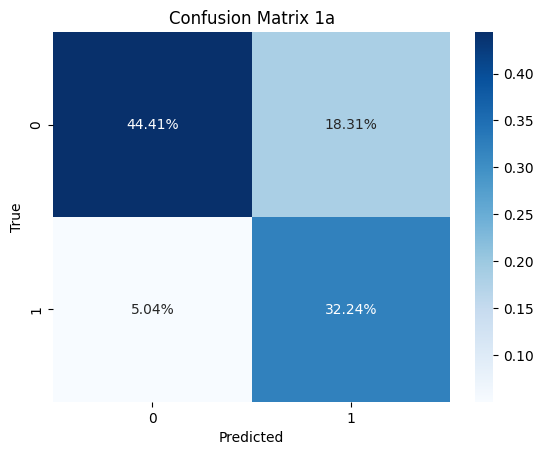

In [9]:
df1a = loop_through(df, variasi_threshold='1a')
print_clf_report(df1a, variasi_threshold='1a')
plot_conf_matrix(df1a, variasi_threshold='1a')

In [10]:
df1a.head()

,instansi,status,reference,status_lev,edit_distance
0,kementerian agraria dan tata ruang badan perta...,yes,kementerian agraria,yes,47
1,kementerian agraria dan tata ruang badan perta...,yes,kementerian tata ruang,yes,44
2,kementerian agraria dan tata ruang badan perta...,yes,kementerian badan pertanahan nasional,yes,29
3,kementerian agraria dan tata ruang badan perta...,yes,badan pertanahan nasional,yes,41
4,kementerian agraria dan tata ruang badan perta...,yes,atr,yes,63


## Variasi 1b

>>>>>> CLASSIFICATION REPORT FOR THRESHOLD VARIATION 1b <<<<<<
              precision    recall  f1-score   support

          no       0.70      0.57      0.63       572
         yes       0.45      0.60      0.51       340

    accuracy                           0.58       912
   macro avg       0.58      0.58      0.57       912
weighted avg       0.61      0.58      0.59       912



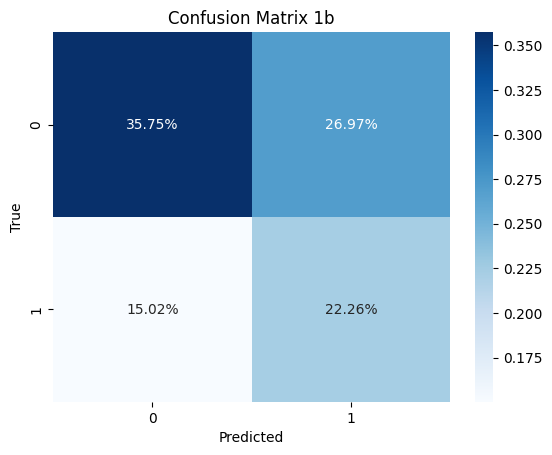

In [11]:
df1b = loop_through(df, variasi_threshold='1b')
print_clf_report(df1b, variasi_threshold='1b')
plot_conf_matrix(df1b, variasi_threshold='1b')

In [12]:
df1b.head()

,instansi,status,reference,status_lev,edit_distance
0,kementerian agraria dan tata ruang badan perta...,yes,kementerian agraria,no,0.712121
1,kementerian agraria dan tata ruang badan perta...,yes,kementerian tata ruang,no,0.666667
2,kementerian agraria dan tata ruang badan perta...,yes,kementerian badan pertanahan nasional,yes,0.439394
3,kementerian agraria dan tata ruang badan perta...,yes,badan pertanahan nasional,no,0.621212
4,kementerian agraria dan tata ruang badan perta...,yes,atr,no,0.954545


## Variasi 1c

>>>>>> CLASSIFICATION REPORT FOR THRESHOLD VARIATION 1c <<<<<<
              precision    recall  f1-score   support

          no       0.63      1.00      0.77       572
         yes       1.00      0.01      0.01       340

    accuracy                           0.63       912
   macro avg       0.81      0.50      0.39       912
weighted avg       0.77      0.63      0.49       912



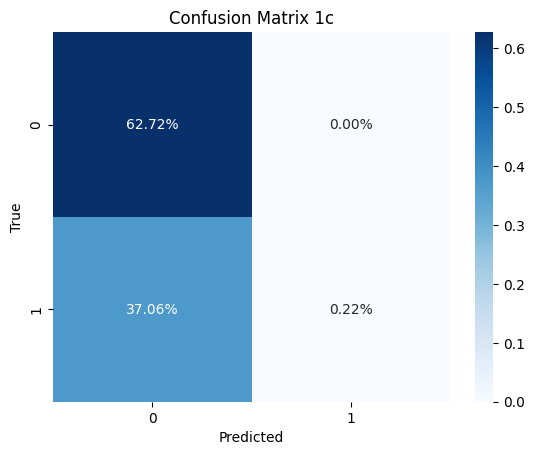

In [13]:
df1c = loop_through(df, variasi_threshold='1c')
print_clf_report(df1c, variasi_threshold='1c')
plot_conf_matrix(df1c, variasi_threshold='1c')

In [14]:
df1c.head()

,instansi,status,reference,status_lev,edit_distance
0,kementerian agraria dan tata ruang badan perta...,yes,kementerian agraria,no,47
1,kementerian agraria dan tata ruang badan perta...,yes,kementerian tata ruang,no,44
2,kementerian agraria dan tata ruang badan perta...,yes,kementerian badan pertanahan nasional,no,29
3,kementerian agraria dan tata ruang badan perta...,yes,badan pertanahan nasional,no,41
4,kementerian agraria dan tata ruang badan perta...,yes,atr,no,63
